In [69]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simps
import pandas as pd
import sys
import math
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

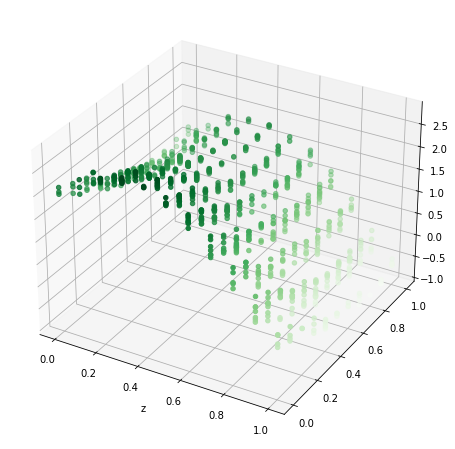

In [233]:
xy = np.random.random((1000, 2))
def fxy(x,y):
    return (-np.sin(y*2) + np.cos(x*2)*2 + 2*np.cos(x)*np.sin(x*2))


xy = (xy - xy.min(axis=0)) / (xy.max(axis=0) - xy.min(axis=0))
z = fxy(xy[:,0:1], xy[:,1:2])
xyz = np.append(xy,z, axis=1)
df = pd.DataFrame(xyz)
df.values[:, :2] = np.round(df.values[:, :2], 1)
df.columns = ["x","y","z"]

plt.figure(figsize=(8,8))

ax = plt.axes(projection='3d')
ax.scatter3D(df.values[:,0], df.values[:,1], df.values[:,2], c= df.values[:,2], cmap='Greens');
plt.xlabel("x")
plt.xlabel("z")
plt.show()

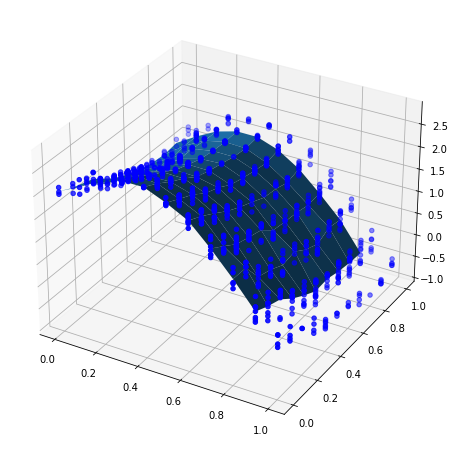

In [246]:
# Learn the approximate DTM
# Linar interpolation is more robust that cubic on the edges.

xzmin = df.groupby(["x","y"])["z"].min()+0.5
xzmin = xzmin.reset_index()
f = interpolate.interp2d(df.values[:,0], df.values[:,1], df.values[:,2], kind='linear')
x = (np.arange(0, 1, 0.1))
y = (np.arange(0, 1, 0.1))
xx, yy = np.meshgrid(x, y)
xx_coord = xx.flatten()
yy_coord = yy.flatten()
zz_coord = f(x,y)
# cf. https://stackoverflow.com/questions/47087109/evaluate-the-output-from-scipy-2d-interpolation-along-a-curve
# zz_coord = interpolate.dfitpack.bispeu(f.tck[0], f.tck[1], f.tck[2], f.tck[3], f.tck[4], xx_coord, yy_coord)[0]

# Visualize
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(df.values[:,0], df.values[:,1], df.values[:,2], c= "b", cmap='Greens');
ax.plot_surface(xx, yy, zz_coord);

In [247]:
# plt.imshow(zz_coord)
# plt.colorbar()

In [238]:
?interpolate.interp2d